In [42]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = yf.download('005930.KS','2021-06-03','2023-06-03')
df.to_excel("삼성전자.xlsx")
df.to_csv("삼성전자.csv")

[*********************100%%**********************]  1 of 1 completed


In [44]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-03,81300.0,83000.0,81100.0,82800.0,78860.312500,29546007
2021-06-04,82700.0,82700.0,81500.0,82200.0,78288.843750,18112259
2021-06-07,82700.0,82800.0,81600.0,81900.0,78003.117188,16496197
2021-06-08,82300.0,82600.0,81800.0,81900.0,78003.117188,12781226
2021-06-09,81500.0,82000.0,81100.0,81100.0,77241.187500,14908823
...,...,...,...,...,...,...
2023-05-26,69800.0,70400.0,69500.0,70300.0,69950.921875,19549511
2023-05-30,71300.0,72300.0,71200.0,72300.0,71940.984375,27476897
2023-05-31,72400.0,72500.0,71000.0,71400.0,71045.453125,25666087


In [45]:
df.shape

(493, 6)

In [46]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)
dfx = df[['Open', 'High', 'Low', 'Close', 'Volume']]
dfx = MinMaxScaler(dfx)

dfy = dfx[['Close']]
dfx = dfx[['Open', 'High', 'Low', 'Volume']]

dfx

,Open,High,Low,Volume
Date,,,,
2021-06-03,0.935484,0.989899,0.970199,0.482221
2021-06-04,0.980645,0.979798,0.983444,0.295611
2021-06-07,0.980645,0.983165,0.986755,0.269235
2021-06-08,0.967742,0.976431,0.993377,0.208603
2021-06-09,0.941935,0.956229,0.970199,0.243327
...,...,...,...,...
2023-05-26,0.564516,0.565657,0.586093,0.319068
2023-05-30,0.612903,0.629630,0.642384,0.448451
2023-05-31,0.648387,0.636364,0.635762,0.418897


In [47]:
time_step = 10
step = 1

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)

In [48]:
X, y = create_dataset(dfx, dfy, time_step, step)

X.shape

(483, 10, 4)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((323, 10, 4), (160, 10, 4), (323, 1), (160, 1))

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X.shape[1:]), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 10, 64)            4416      
                                                                 
 dropout_6 (Dropout)         (None, 10, 64)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12737 (49.75 KB)
Trainable params: 12737 (49.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.33, shuffle=False)
y_pred = model.predict(X_test)

Epoch 1/500
7/7 [==============================] - 2s 43ms/step - loss: 1.1362 - val_loss: 0.0693
Epoch 2/500
7/7 [==============================] - 0s 10ms/step - loss: 0.4316 - val_loss: 0.0064
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 0.1300 - val_loss: 0.0403
Epoch 4/500
7/7 [==============================] - 0s 10ms/step - loss: 0.1112 - val_loss: 0.0064
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0631 - val_loss: 0.0068
Epoch 6/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0820 - val_loss: 0.0062
Epoch 7/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0516 - val_loss: 0.0112
Epoch 8/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0540 - val_loss: 0.0123
Epoch 9/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0427 - val_loss: 0.0106
Epoch 10/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0439 - val_loss: 0.0114
Epoch 11/500
7/7 [======

7/7 [==============================] - 0s 8ms/step - loss: 0.0125 - val_loss: 0.0185
Epoch 85/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0140 - val_loss: 0.0206
Epoch 86/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0135 - val_loss: 0.0199
Epoch 87/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0141 - val_loss: 0.0217
Epoch 88/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0142 - val_loss: 0.0177
Epoch 89/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0172 - val_loss: 0.0187
Epoch 90/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0118 - val_loss: 0.0186
Epoch 91/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0123 - val_loss: 0.0211
Epoch 92/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0114 - val_loss: 0.0179
Epoch 93/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0133 - val_loss: 0.0185
Epoch 94/500
7/7 [===============

7/7 [==============================] - 0s 10ms/step - loss: 0.0109 - val_loss: 0.0236
Epoch 167/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0093 - val_loss: 0.0236
Epoch 168/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0096 - val_loss: 0.0265
Epoch 169/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0094 - val_loss: 0.0248
Epoch 170/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0095 - val_loss: 0.0277
Epoch 171/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0116 - val_loss: 0.0253
Epoch 172/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0121 - val_loss: 0.0242
Epoch 173/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0102 - val_loss: 0.0258
Epoch 174/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0116 - val_loss: 0.0264
Epoch 175/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0092 - val_loss: 0.0263
Epoch 176/500
7/7 [===

7/7 [==============================] - 0s 11ms/step - loss: 0.0073 - val_loss: 0.0506
Epoch 249/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0068 - val_loss: 0.0451
Epoch 250/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0084 - val_loss: 0.0583
Epoch 251/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0081 - val_loss: 0.0512
Epoch 252/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0072 - val_loss: 0.0495
Epoch 253/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0072 - val_loss: 0.0505
Epoch 254/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0067 - val_loss: 0.0492
Epoch 255/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0068 - val_loss: 0.0525
Epoch 256/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0071 - val_loss: 0.0487
Epoch 257/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0062 - val_loss: 0.0542
Epoch 258/500
7/7 [====

7/7 [==============================] - 0s 9ms/step - loss: 0.0063 - val_loss: 0.0535
Epoch 331/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0058 - val_loss: 0.0579
Epoch 332/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0056 - val_loss: 0.0538
Epoch 333/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0061 - val_loss: 0.0606
Epoch 334/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0060 - val_loss: 0.0499
Epoch 335/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0067 - val_loss: 0.0575
Epoch 336/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0070 - val_loss: 0.0535
Epoch 337/500
7/7 [==============================] - 0s 11ms/step - loss: 0.0063 - val_loss: 0.0525
Epoch 338/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0066 - val_loss: 0.0570
Epoch 339/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0048 - val_loss: 0.0555
Epoch 340/500
7/7 

7/7 [==============================] - 0s 11ms/step - loss: 0.0042 - val_loss: 0.0479
Epoch 413/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0045 - val_loss: 0.0521
Epoch 414/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0047 - val_loss: 0.0492
Epoch 415/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0044 - val_loss: 0.0528
Epoch 416/500
7/7 [==============================] - 0s 11ms/step - loss: 0.0045 - val_loss: 0.0506
Epoch 417/500
7/7 [==============================] - 0s 11ms/step - loss: 0.0039 - val_loss: 0.0525
Epoch 418/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0041 - val_loss: 0.0517
Epoch 419/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0539
Epoch 420/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0044 - val_loss: 0.0534
Epoch 421/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0047 - val_loss: 0.0510
Epoch 422/500
7/

7/7 [==============================] - 0s 9ms/step - loss: 0.0034 - val_loss: 0.0626
Epoch 495/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0031 - val_loss: 0.0610
Epoch 496/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0031 - val_loss: 0.0621
Epoch 497/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0031 - val_loss: 0.0629
Epoch 498/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0027 - val_loss: 0.0644
Epoch 499/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0034 - val_loss: 0.0625
Epoch 500/500
5/5 [==============================] - 0s 2ms/step


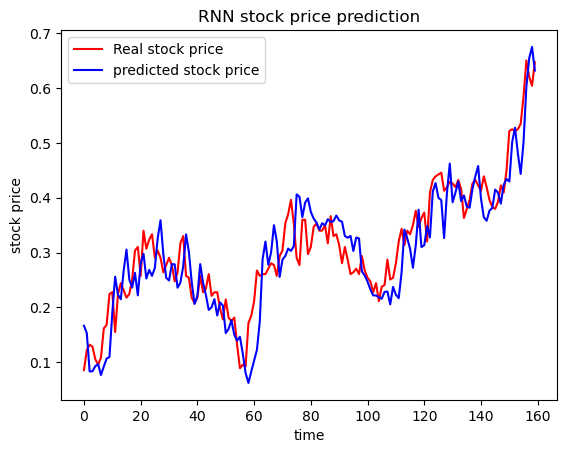

In [52]:

plt.plot(y_test, color='red', label='Real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('RNN stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [53]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
model2 = Sequential()
model2.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(X.shape[1:])))
model2.add(Dropout(0.1))
model2.add(LSTM(units=64, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(units=1))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 64)            17664     
                                                                 
 dropout_8 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 50753 (198.25 KB)
Trainable params: 50753 (198.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(X_train, y_train, epochs=500, batch_size=30)
pred_y = model2.predict(X_test)

Epoch 1/500
11/11 [==============================] - 3s 9ms/step - loss: 0.2285
Epoch 2/500
11/11 [==============================] - 0s 10ms/step - loss: 0.0390
Epoch 3/500
11/11 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 4/500
11/11 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 5/500
11/11 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 6/500
11/11 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 7/500
11/11 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 8/500
11/11 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 9/500
11/11 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 10/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 11/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0067
Epoch 12/500
11/11 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 13/500
11/11 [==============

11/11 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 103/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 104/500
11/11 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 105/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 106/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 107/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 108/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 109/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 110/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 111/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 112/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 113/500
11/11 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 114/500
11/11 [=========

11/11 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 203/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 204/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 205/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 206/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 207/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 208/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 209/500
11/11 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 210/500
11/11 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 211/500
11/11 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 212/500
11/11 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 213/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 214/500
11/11 [========

11/11 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 303/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 304/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 305/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 306/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 307/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 308/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 309/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 310/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 311/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 312/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 313/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 314/500
11/11 [=========

11/11 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 403/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 404/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 405/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 406/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 407/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 408/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 409/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 410/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 411/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 412/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 413/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 414/500
11/11 [=========

5/5 [==============================] - 0s 4ms/step


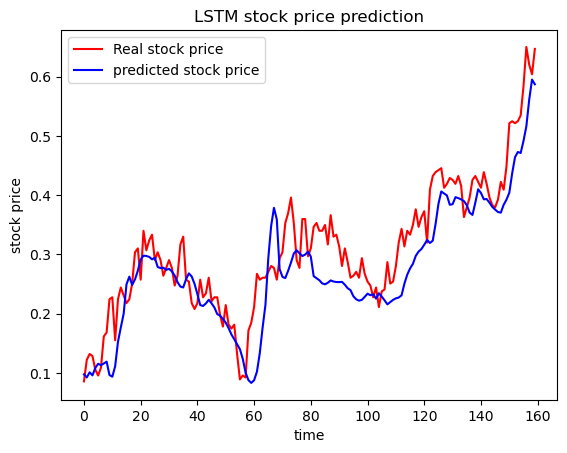

In [55]:
pred_y = model2.predict(X_test)

plt.figure()
plt.plot(y_test, color='red', label='Real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('LSTM stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [56]:
model3 = Sequential()
model3.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X.shape[1:])))
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 8, 128)            1664      
                                                                 
 conv1d_3 (Conv1D)           (None, 6, 64)             24640     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 3, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               19300     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                      

In [57]:
model3.compile(optimizer='adam', loss='mean_squared_error')
model3.fit(X_train, y_train, epochs=500, batch_size=30)
pred_y = model3.predict(X_test)

Epoch 1/500
11/11 [==============================] - 1s 3ms/step - loss: 0.0502
Epoch 2/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 3/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 4/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 5/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 6/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 7/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 8/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 9/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 10/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 11/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 12/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 13/500
11/11 [=================

11/11 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 103/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 104/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 105/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 106/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 107/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 108/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 109/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 110/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 111/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 112/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 113/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 114/500
11/11 [=========

11/11 [==============================] - 0s 3ms/step - loss: 6.1494e-04
Epoch 199/500
11/11 [==============================] - 0s 4ms/step - loss: 6.6833e-04
Epoch 200/500
11/11 [==============================] - 0s 3ms/step - loss: 6.7243e-04
Epoch 201/500
11/11 [==============================] - 0s 3ms/step - loss: 6.3370e-04
Epoch 202/500
11/11 [==============================] - 0s 3ms/step - loss: 7.2302e-04
Epoch 203/500
11/11 [==============================] - 0s 3ms/step - loss: 8.4234e-04
Epoch 204/500
11/11 [==============================] - 0s 3ms/step - loss: 6.9176e-04
Epoch 205/500
11/11 [==============================] - 0s 3ms/step - loss: 6.1025e-04
Epoch 206/500
11/11 [==============================] - 0s 3ms/step - loss: 5.9715e-04
Epoch 207/500
11/11 [==============================] - 0s 3ms/step - loss: 5.9121e-04
Epoch 208/500
11/11 [==============================] - 0s 3ms/step - loss: 5.9549e-04
Epoch 209/500
11/11 [==============================] - 0s 3ms/step -

11/11 [==============================] - 0s 3ms/step - loss: 3.5508e-04
Epoch 294/500
11/11 [==============================] - 0s 3ms/step - loss: 4.3099e-04
Epoch 295/500
11/11 [==============================] - 0s 3ms/step - loss: 3.9115e-04
Epoch 296/500
11/11 [==============================] - 0s 3ms/step - loss: 4.5780e-04
Epoch 297/500
11/11 [==============================] - 0s 3ms/step - loss: 4.5413e-04
Epoch 298/500
11/11 [==============================] - 0s 3ms/step - loss: 5.1685e-04
Epoch 299/500
11/11 [==============================] - 0s 3ms/step - loss: 4.3271e-04
Epoch 300/500
11/11 [==============================] - 0s 2ms/step - loss: 4.0511e-04
Epoch 301/500
11/11 [==============================] - 0s 2ms/step - loss: 4.0619e-04
Epoch 302/500
11/11 [==============================] - 0s 3ms/step - loss: 4.2683e-04
Epoch 303/500
11/11 [==============================] - 0s 3ms/step - loss: 3.8682e-04
Epoch 304/500
11/11 [==============================] - 0s 3ms/step -

11/11 [==============================] - 0s 3ms/step - loss: 4.2483e-04
Epoch 389/500
11/11 [==============================] - 0s 3ms/step - loss: 4.5125e-04
Epoch 390/500
11/11 [==============================] - 0s 2ms/step - loss: 3.8776e-04
Epoch 391/500
11/11 [==============================] - 0s 2ms/step - loss: 3.4437e-04
Epoch 392/500
11/11 [==============================] - 0s 3ms/step - loss: 3.9066e-04
Epoch 393/500
11/11 [==============================] - 0s 2ms/step - loss: 2.6879e-04
Epoch 394/500
11/11 [==============================] - 0s 2ms/step - loss: 2.5667e-04
Epoch 395/500
11/11 [==============================] - 0s 3ms/step - loss: 2.3607e-04
Epoch 396/500
11/11 [==============================] - 0s 2ms/step - loss: 2.1768e-04
Epoch 397/500
11/11 [==============================] - 0s 2ms/step - loss: 2.6985e-04
Epoch 398/500
11/11 [==============================] - 0s 3ms/step - loss: 3.5139e-04
Epoch 399/500
11/11 [==============================] - 0s 2ms/step -

11/11 [==============================] - 0s 3ms/step - loss: 1.4864e-04
Epoch 484/500
11/11 [==============================] - 0s 2ms/step - loss: 1.6306e-04
Epoch 485/500
11/11 [==============================] - 0s 3ms/step - loss: 1.5936e-04
Epoch 486/500
11/11 [==============================] - 0s 3ms/step - loss: 1.2775e-04
Epoch 487/500
11/11 [==============================] - 0s 3ms/step - loss: 1.1926e-04
Epoch 488/500
11/11 [==============================] - 0s 2ms/step - loss: 1.2555e-04
Epoch 489/500
11/11 [==============================] - 0s 3ms/step - loss: 1.4499e-04
Epoch 490/500
11/11 [==============================] - 0s 3ms/step - loss: 1.8918e-04
Epoch 491/500
11/11 [==============================] - 0s 2ms/step - loss: 1.6637e-04
Epoch 492/500
11/11 [==============================] - 0s 3ms/step - loss: 1.5306e-04
Epoch 493/500
11/11 [==============================] - 0s 3ms/step - loss: 1.4060e-04
Epoch 494/500
11/11 [==============================] - 0s 3ms/step -

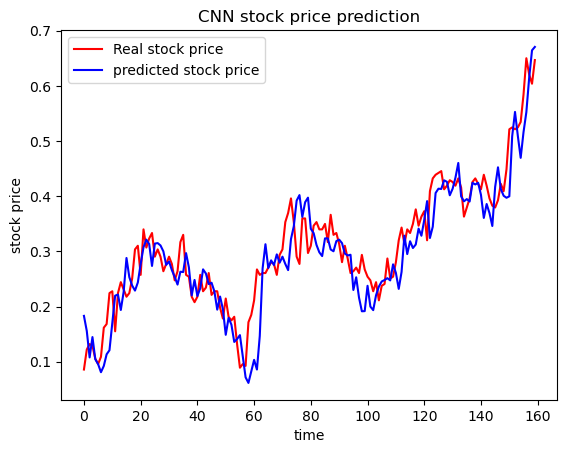

In [58]:


plt.figure()
plt.plot(y_test, color='red', label='Real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('CNN stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()